In [2]:
import tweepy

CONSUMER_KEY = "8CwYZK4OiPzanM37Zr6AmsWMp"
CONSUMER_SECRET = "YKQFJJ6F3j57lZUWYakWD4OVq7C3sSN2IioGHsXYb4nFCbFq0G"
ACCESS_TOKEN = "3257201272-frIpMEIOQLgW4lypnLiZw9yCtUoUjZykTM0g9Kw"
ACCESS_TOKEN_SECRET = "5qKU38TOSjHHQWnEajwUGDoi0hP4k7cSYp2HgRhhcXl76"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [3]:
### TRADUCTOR!!!!!!!!!!!!!!!!!!
import requests
def Traduccion(source, target, text):
    parametros = {'sl': source, 'tl': target, 'q': text}
    cabeceras = {"Charset":"UTF-8","User-Agent":"AndroidTranslate/5.3.0.RC02.130475354-53000263 5.1 phone TRANSLATE_OPM5_TEST_1"}
    url = "https://translate.google.com/translate_a/single?client=at&dt=t&dt=ld&dt=qca&dt=rm&dt=bd&dj=1&hl=es-ES&ie=UTF-8&oe=UTF-8&inputm=2&otf=2&iid=1dd3b944-fa62-4b55-b330-74909a99969e"
    response = requests.post(url, data=parametros, headers=cabeceras)
    if response.status_code == 200:
        for x in response.json()['sentences']:
            return x['trans']
    else:
        return "Ocurrió un error"


def _traducir (texto):
    nuevo_texto=""
    i = 0
    for t in texto.split(" "):
        t = Traduccion("es", "en", t)
        if (i == 0 ):
            nuevo_texto = nuevo_texto + t
            i+=1
        else:
            nuevo_texto = nuevo_texto + " " + t
        
    return nuevo_texto
    
_traducir(".hola mundo... como estas?")

u'.Hello world... how these?'

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from textblob import TextBlob

def get_stuff(nombre=None):
    stuff = tweepy.Cursor(api.user_timeline, screen_name = nombre, include_rts = True,tweet_mode='extended')
    return stuff


def get_tweets(stuff, n , traducir):
    
    lista1 = []
    lista2 = []
    i = 0
    for status in stuff.items(n):
        pos_count = 0.0
        pos_correct = 0.0

        neg_count = 0
        neg_correct = 0
        
        #print(status.created_at, status.author.screen_name, status.text)
        i += 1
        print ("\n\nTWEET NUMERO : ", i, "***********************************************")
        
        print ("\n\nNombre :\n\n", status.author.screen_name )
        texto = status.full_text
        if traducir:
            print ("\nantes   =", texto)
            texto = _traducir(texto)
            print ("\ndespues =", texto)
        else:
            print ("\ntweet :\n\n", texto)
            
        for text in texto.split('\n' or ','):
            analysis = TextBlob(text)
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1
            
            if analysis.sentiment.polarity <= 0:
                neg_correct += 1
            neg_count +=1
            
        print("\nSentimiento positivo = ",(pos_correct/pos_count)*100.0, "%")
        lista1.append((pos_correct/pos_count)*100.0)
        print("Sentimiento negativo = ",(neg_correct/neg_count)*100.0 ,"%")
        lista2.append((neg_correct/neg_count)*100.0)
    
    lista1 = lista1[::-1]
    plt.plot(lista1)
    plt.title("SENTIMIENTO POSITIVO")
    plt.ylabel("positivo")
    plt.xlabel("instancias de emociones")
    plt.show()
    
    lista2 = lista2[::-1]
    plt.plot(lista2)
    plt.title("SENTIMIENTO NEGATIVO")
    plt.ylabel("negativo")
    plt.xlabel("instancias de emociones")
    plt.show()
    print ("lista 1 = ", lista1)
    print ("lista 2 = ", lista2)
        


Cuantos tweets desea obtener: 3
('\n\nTWEET NUMERO : ', 1, '***********************************************')
('\n\nNombre :\n\n', u'nashnisman')
('\nantes   =', u'RT @NASAInSight: The mole is digging deeper into #Mars thanks to the tremendous efforts by my team. Unofficial depth is ~38 cm down in the\u2026')
('\ndespues =', u'RT @NASAInSight: The mass is digging deeper into #Mars thanks to the tremendous efforts by my team. Unofficial depth is ~ 38 cm down in the ...')
('\nSentimiento positivo = ', 100.0, '%')
('Sentimiento negativo = ', 0.0, '%')
('\n\nTWEET NUMERO : ', 2, '***********************************************')
('\n\nNombre :\n\n', u'nashnisman')
('\nantes   =', u'hola amigos como est\xe1n, estoy feliz, estoy haciendo una prueba')
('\ndespues =', u'Hello friends how is it so, am happy, am doing a proof')
('\nSentimiento positivo = ', 100.0, '%')
('Sentimiento negativo = ', 0.0, '%')
('\n\nTWEET NUMERO : ', 3, '***********************************************')
('\n\nNombre

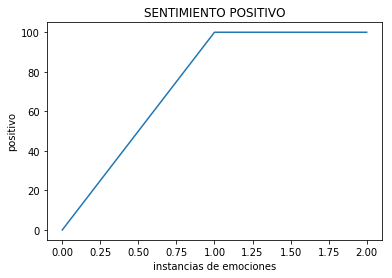

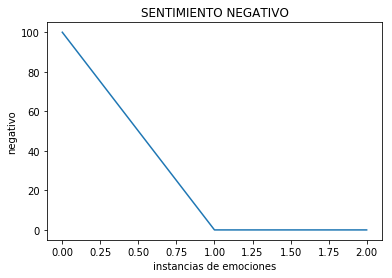

('lista 1 = ', [0.0, 100.0, 100.0])
('lista 2 = ', [100.0, 0.0, 0.0])


In [10]:
##################################### OBTENER TWEETS DESDE MI PROPIO PERFIL ############
traducir = True

n = int(input('Cuantos tweets desea obtener: '))
stuff = get_stuff()
get_tweets(stuff, n , traducir)